In [ ]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Новый раздел

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [ ]:
data = pd.concat([test, train], ignore_index=True)

In [ ]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [ ]:
data.shape

(1309, 12)

In [ ]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64

In [ ]:
data.nunique()

PassengerId    1309
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
Survived          2
dtype: int64

In [ ]:
import seaborn as sns

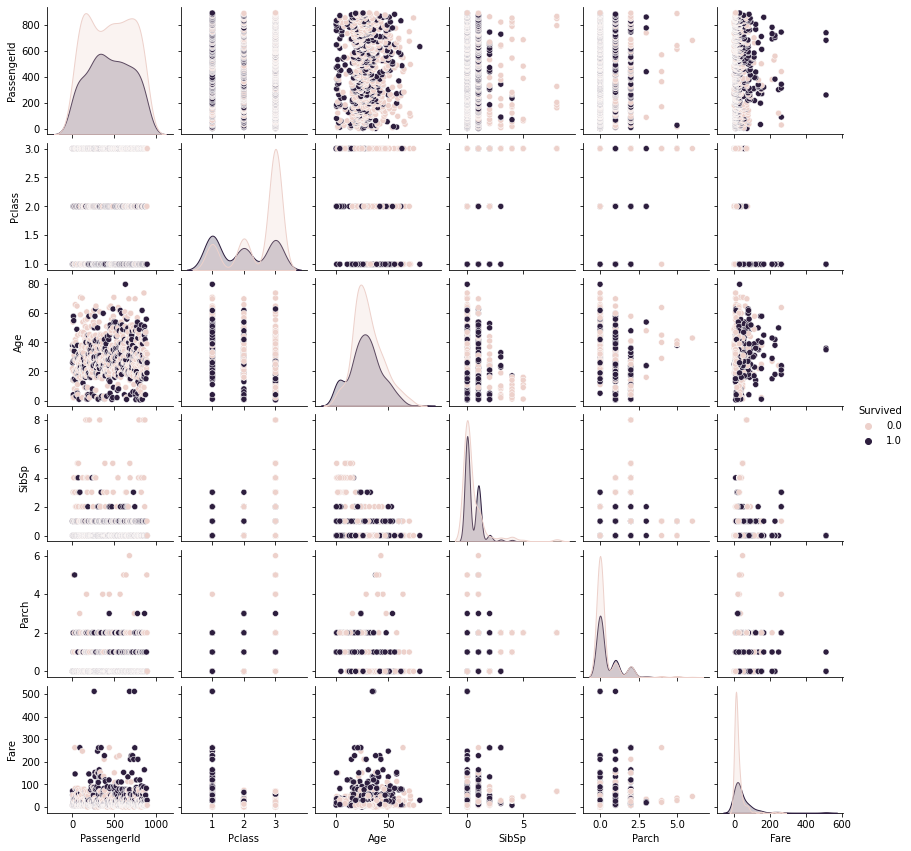

In [ ]:
sns.pairplot(data, hue="Survived", height=2)

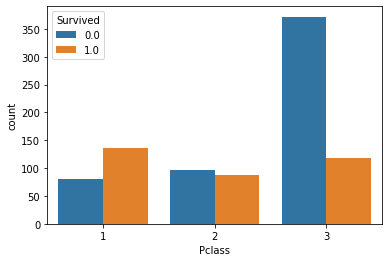

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)

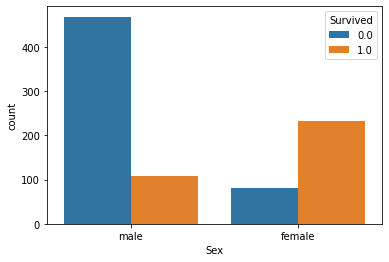

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=data)

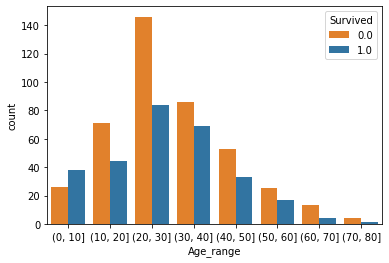

In [ ]:
data['Age_range'] = pd.cut(data.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x = 'Age_range', hue = 'Survived', data=data, palette=["C1", "C0"])

In [ ]:
pd.DataFrame(data.Age.describe())

,Age
count,1046.000000
mean,29.881138
std,14.413493
min,0.170000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [ ]:
pd.DataFrame(data.SibSp.describe())

,SibSp
count,1309.000000
mean,0.498854
std,1.041658
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


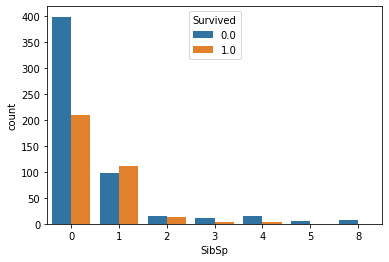

In [ ]:
sns.countplot(x = 'SibSp', hue = 'Survived', data=data)

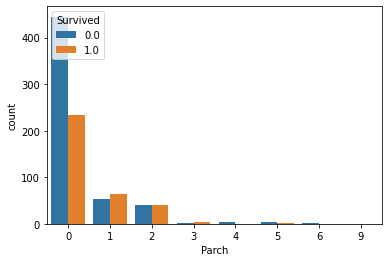

In [ ]:
sns.countplot(x = 'Parch', hue = 'Survived', data=data)

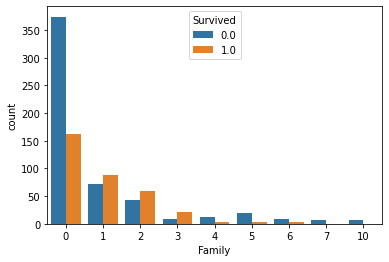

In [ ]:
data['Family'] = data.Parch + data.SibSp
sns.countplot(x ='Family', hue='Survived', data=data)

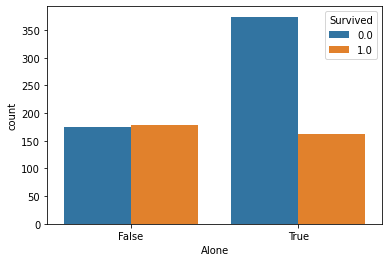

In [ ]:
data['Alone'] = data.Family==0
sns.countplot(x='Alone', hue='Survived', data=data)

In [ ]:
sum(data.Alone)

790

In [ ]:
sum(data.Family==0)

790

In [ ]:
data.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Age_range,Family,Alone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,"(30.0, 40.0]",0,True
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,"(40.0, 50.0]",1,False
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,"(60.0, 70.0]",0,True
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,"(20.0, 30.0]",0,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,"(20.0, 30.0]",2,False
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,NaN,"(10.0, 20.0]",0,True
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,NaN,"(20.0, 30.0]",0,True
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,NaN,"(20.0, 30.0]",2,False
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,NaN,"(10.0, 20.0]",0,True
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,NaN,"(20.0, 30.0]",2,False


In [ ]:
data.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

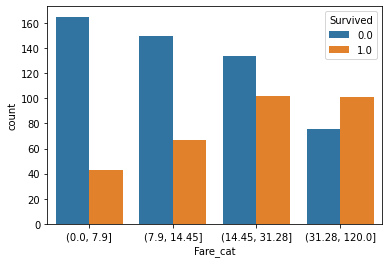

In [ ]:
data['Fare_cat'] = pd.cut(data['Fare'], [0,7.90,14.45,31.28,120])
sns.countplot(x='Fare_cat', hue='Survived', data=data)

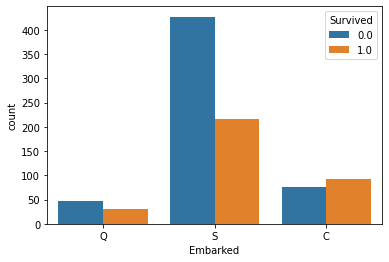

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=data)

In [ ]:
data['Embarked'].fillna(data.Embarked.mode()[0], inplace=True) #заполнение пропусков в данных

In [ ]:
data.Embarked

0       Q
1       S
2       Q
3       S
4       S
       ..
1304    S
1305    S
1306    S
1307    C
1308    Q
Name: Embarked, Length: 1309, dtype: object

In [ ]:
data['Salutation'] = data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip(' '))

In [ ]:
data.Salutation

0         Mr
1        Mrs
2         Mr
3         Mr
4        Mrs
        ... 
1304     Rev
1305    Miss
1306    Miss
1307      Mr
1308      Mr
Name: Salutation, Length: 1309, dtype: object

In [ ]:
data.Salutation.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
the Countess      1
Capt              1
Dona              1
Sir               1
Lady              1
Mme               1
Jonkheer          1
Don               1
Name: Salutation, dtype: int64

In [ ]:
grp = data.groupby(['Sex', 'Pclass'])

In [ ]:
grp.mean()

PassengerId        Age     SibSp  ...  Survived    Family     Alone
Sex    Pclass                                    ...                              
female 1        689.652778  37.037594  0.555556  ...  0.968085  1.027778  0.361111
       2        632.188679  27.499223  0.500000  ...  0.921053  1.150943  0.396226
       3        628.393519  22.185329  0.791667  ...  0.500000  1.523148  0.462963
male   1        658.687151  41.029272  0.340782  ...  0.368852  0.620112  0.603352
       2        695.976608  30.815380  0.327485  ...  0.157407  0.520468  0.678363
       3        645.888438  25.962264  0.470588  ...  0.135447  0.726166  0.754564

[6 rows x 8 columns]

In [ ]:
data.Age = grp.Age.apply(lambda x: x.fillna(x.median()))
data.Age

0       34.5
1       47.0
2       62.0
3       27.0
4       22.0
        ... 
1304    27.0
1305    19.0
1306    22.0
1307    26.0
1308    32.0
Name: Age, Length: 1309, dtype: float64

In [ ]:
sum(data.Age.isnull())

0

In [ ]:
sum(data.Cabin.isnull())

1014

In [ ]:
data.Cabin = data.Cabin.fillna('NA')

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex']) #обработка категориальных признаков

In [ ]:
data.Sex

0       1
1       0
2       1
3       1
4       0
       ..
1304    1
1305    0
1306    0
1307    1
1308    1
Name: Sex, Length: 1309, dtype: int64

In [ ]:
data['Alone'] = LabelEncoder().fit_transform(data['Alone'])
data['Alone']

0       1
1       0
2       1
3       1
4       0
       ..
1304    1
1305    1
1306    0
1307    1
1308    1
Name: Alone, Length: 1309, dtype: int64

In [ ]:
data = pd.concat([data,pd.get_dummies(data.Cabin, prefix="Cabin", drop_first=True), pd.get_dummies(data.Age_range, prefix="Age_range", drop_first=True), pd.get_dummies(data.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(data.Salutation, prefix="Title", drop_first = True), pd.get_dummies(data.Fare_cat, prefix="Fare", drop_first = True), pd.get_dummies(data.Pclass, prefix="Class", drop_first = True)], axis=1)

In [ ]:
data.drop(['Cabin', 'Age_range', 'Embarked', 'Salutation', 'Fare_cat', 'Pclass', 'Age', 'Parch', 'Ticket', 'SibSp', 'Name', 'Fare'], axis=1, inplace=True)

In [ ]:
data = data.rename(columns={'Age_range_(10, 20]': 'Age_range_(10, 20)',
                            'Age_range_(20, 30]': 'Age_range_(20, 30)',
                            'Age_range_(30, 40]': 'Age_range_(30, 40)',
                            'Age_range_(40, 50]': 'Age_range_(40, 50)',
                            'Age_range_(50, 60]': 'Age_range_(50, 60)',
                            'Age_range_(60, 70]': 'Age_range_(60, 70)',
                            'Age_range_(70, 80]': 'Age_range_(70, 80)',})

In [ ]:
data = data.rename(columns={'Fare_(7.9, 14.45]': 'Fare_(7.9, 14.45)',
                            'Fare_(14.45, 31.28]': 'Fare_(14.45, 31.28)',
                            'Fare_(31.28, 120.0]': 'Fare_(31.28, 120.0)'})

In [ ]:
data

,PassengerId,Sex,Survived,Family,Alone,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,Cabin_B37,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,"Age_range_(10, 20)","Age_range_(20, 30)","Age_range_(30, 40)","Age_range_(40, 50)","Age_range_(50, 60)","Age_range_(60, 70)","Age_range_(70, 80)",Emb_Q,Emb_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,"Fare_(7.9, 14.45)","Fare_(14.45, 31.28)","Fare_(31.28, 120.0)",Class_2,Class_3
0,892,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,893,0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,894,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,895,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,896,0,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1305,888,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,889,0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,890,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_predicted = data[data.Survived.isnull()]
X_predicted = X_predicted.drop(['Survived'], axis = 1)

In [ ]:
train = data.dropna()
feature_train = train['Survived']
label_train = train.drop(['Survived'], axis = 1)

In [ ]:
X_predicted

,PassengerId,Sex,Family,Alone,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,Cabin_B37,Cabin_B38,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,"Age_range_(10, 20)","Age_range_(20, 30)","Age_range_(30, 40)","Age_range_(40, 50)","Age_range_(50, 60)","Age_range_(60, 70)","Age_range_(70, 80)",Emb_Q,Emb_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,"Fare_(7.9, 14.45)","Fare_(14.45, 31.28)","Fare_(31.28, 120.0)",Class_2,Class_3
0,892,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,893,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,894,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
3,895,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,896,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
414,1306,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
415,1307,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
416,1308,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
train

,PassengerId,Sex,Survived,Family,Alone,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,Cabin_B37,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,"Age_range_(10, 20)","Age_range_(20, 30)","Age_range_(30, 40)","Age_range_(40, 50)","Age_range_(50, 60)","Age_range_(60, 70)","Age_range_(70, 80)",Emb_Q,Emb_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,"Fare_(7.9, 14.45)","Fare_(14.45, 31.28)","Fare_(31.28, 120.0)",Class_2,Class_3
418,1,1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
419,2,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
420,3,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
421,4,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
422,5,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1305,888,0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,889,0,0.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,890,1,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
feature_train

418     0.0
419     1.0
420     1.0
421     1.0
422     0.0
       ... 
1304    0.0
1305    1.0
1306    0.0
1307    1.0
1308    0.0
Name: Survived, Length: 891, dtype: float64

In [ ]:
label_train 

,PassengerId,Sex,Family,Alone,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,Cabin_A19,Cabin_A20,Cabin_A21,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A29,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_A9,Cabin_B10,Cabin_B101,Cabin_B102,Cabin_B11,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B24,Cabin_B26,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B36,Cabin_B37,Cabin_B38,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,"Age_range_(10, 20)","Age_range_(20, 30)","Age_range_(30, 40)","Age_range_(40, 50)","Age_range_(50, 60)","Age_range_(60, 70)","Age_range_(70, 80)",Emb_Q,Emb_S,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,"Fare_(7.9, 14.45)","Fare_(14.45, 31.28)","Fare_(31.28, 120.0)",Class_2,Class_3
418,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
419,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
420,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
421,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
422,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,887,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1305,888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1306,889,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,890,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Случайный лес
from sklearn.ensemble import RandomForestClassifier
model_1 = RandomForestClassifier(criterion='entropy',
                                 n_estimators=1000,
                                 min_samples_split=3,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 oob_score=True,
                                 random_state=123,
                                 n_jobs=-1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2, random_state = 123, stratify = feature_train)

In [ ]:
model_1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [ ]:
import seaborn as sns
print(model_1.score(x_test, y_test))
result_rf=cross_val_score(model_1,x_train,y_train,cv=10,scoring='accuracy')
print(result_rf.mean())

0.8324022346368715
0.8158841940532081


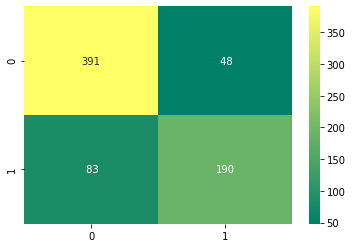

In [ ]:
y_pred = cross_val_predict(model_1,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
# plt.title('Confusion_matrix for RF', y=1.05, size=15)

0.8324022346368715
0.8130477308294211


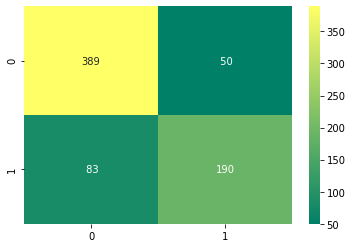

In [ ]:
model_2 = RandomForestClassifier(criterion='gini',
                                 n_estimators=1000,
                                 min_samples_split=3,
                                 min_samples_leaf=1,
                                 max_features='auto',
                                 oob_score=True,
                                 random_state=123,
                                 n_jobs=-1)
model_2.fit(x_train, y_train)
print(model_2.score(x_test, y_test))
result_rf=cross_val_score(model_2,x_train,y_train,cv=10,scoring='accuracy')
print(result_rf.mean())
y_pred = cross_val_predict(model_2,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")

0.8268156424581006
0.8298904538341159


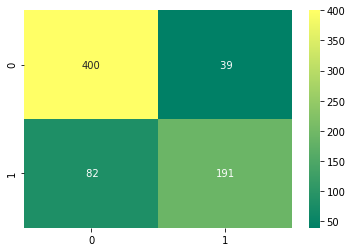

In [ ]:
#XGBoost
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
import xgboost as xgb
model_3 = xgb.XGBClassifier()
model_3.fit(x_train, y_train)
print(model_3.score(x_test, y_test))
result_rf=cross_val_score(model_3,x_train,y_train,cv=10,scoring='accuracy')
print(result_rf.mean())
y_pred = cross_val_predict(model_3,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model_3, label_train, feature_train, cv=cv, n_jobs=-1)
# print('SCORE: %.2f (%.2f)' % (np.mean(n_scores), np.std(n_scores)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {
    'n_estimators': range(8, 20),
    'max_depth': range(6, 10),
    'learning_rate': [.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1]
}

gbm = xgb.XGBClassifier(n_estimators=10)

xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = gbm, scoring = "accuracy", 
                                    verbose = 1, n_iter = 50, cv = 4)


# Fit randomized_mse to the data
xgb_random.fit(x_train,y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", xgb_random.best_params_)
print("Best accuracy found: ", xgb_random.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters found:  {'n_estimators': 9, 'max_depth': 8, 'learning_rate': 0.6, 'colsample_bytree': 1}
Best accuracy found:  0.8258426966292134


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.9s finished
